<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
import io

In [3]:
uploaded1 = files.upload()

Saving train.csv to train.csv


In [5]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [6]:
train_df = pd.read_csv(io.StringIO(uploaded1['train.csv'].decode('utf-8')))
test_df = pd.read_csv(io.StringIO(uploaded2['test.csv'].decode('utf-8')))
out = train_df.append(test_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
pd.pivot_table(train_df,index="Pclass",columns="Sex",values="Survived",aggfunc="mean")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## Answer 10- As we can see, women were most likely to survive. It is equal to 74%.

In [8]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Answer - 9 - As we see, there is correalation between pclass and survived so we will include this in our model

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Answer 11 - As we can see, infants <4 had a high survival rate.
## Oldest passagen survived. 15-25 year old mostly did not survive as we can see from the plot. After seeing the correclation, we can decide to choose age in our model. But before that we need to fill null values in the age feature.
We should band age groups.

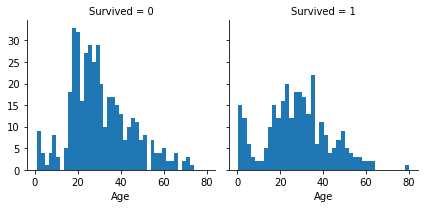

In [11]:
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

graph = sea.FacetGrid(train_df, col='Survived')
graph.map(plt.hist, 'Age', bins=40)

## Abswer 12 - As seen, Pclass=3, most did not survived.Yes,YEs yes yes yes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


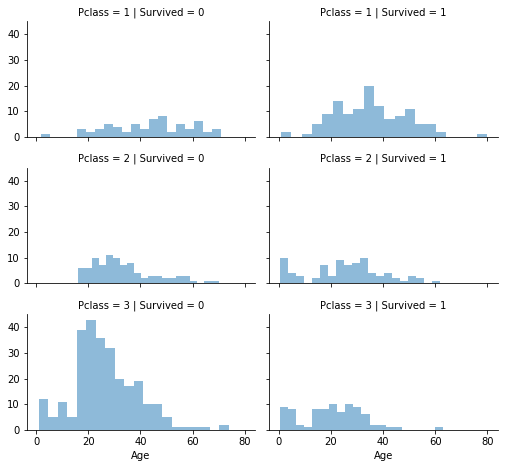

In [12]:
grid = sea.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Answer 13 - Yes, yes, yes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


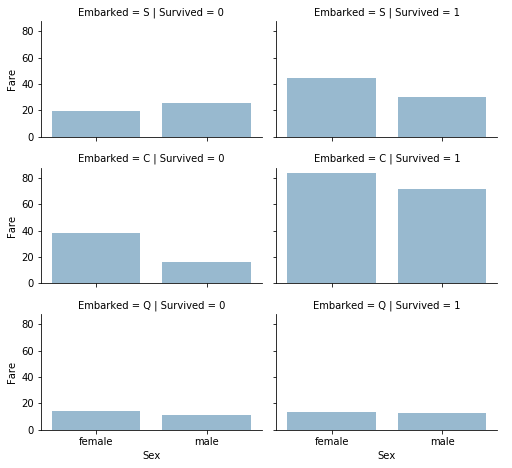

In [63]:
grid = sea.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sea.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Answer 14 -  ((891-681)/891)*100 = 23% of duplicate values so it can be dropped. Also there might be no correaltion

In [64]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

## Answer 15 - Cabin had duplicate values and null values. So can be dropped. 1014 null values

In [65]:
train_df['Cabin'].describe()
out = train_df.append(test_df, sort=False)
out['Cabin'].isna().sum()

1014

## Answer - 16

In [66]:
mapping_dict = {'female':1,
                'male':0}
out['Sex'] = out['Sex'].map(mapping_dict)
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


## Answer 17

In [0]:
from sklearn.impute import KNNImputer

In [0]:
imputer = KNNImputer(n_neighbors=2)

In [69]:
out['Age'] = imputer.fit_transform(out[['Age']])
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,S


## Aanswer 18

In [70]:
out['Embarked'].value_counts().index[0]

'S'

In [71]:
out = out.fillna(out['Embarked'].value_counts().index[0])
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,S,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,S,S
414,1306,S,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,S,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,S
416,1308,S,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,S,S


## Answer 19

In [72]:
test_df['Fare'].isnull().sum()

0

In [73]:
test_df['Fare'].mode()[0]

7.75

In [74]:
for column in test_df['Fare']:
    test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)
test_df['Fare'].isnull().sum()

0

## Answer 20 

In [75]:
out = train_df.append(test_df, sort=False)
r = [-0.001, 7.91, 14.454, 31.0, 512.329]
g = [0,1,2,3]
out['Fare'] = pd.cut(out['Fare'], bins=r, labels=g)
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,1,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,3,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,0,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,1,NaN,S
